# 소스코드 통합예정

In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
from os import getcwd

In [115]:
cur_path = getcwd()
data_path = join(cur_path,'data')
static_path = join(cur_path,'static')

df_test = pd.read_csv(join(data_path,'test.csv'))
df_train = pd.read_csv(join(data_path,'train.csv'))
data = [df_test,df_train]

# 확인용, 나중에 지움
print('[current Absolute Path]\t{}'.format(cur_path))
print('[data folder Absolute Path]\t {}'.format(data_path))
print('[image folder Absolute Path]\t {}'.format(static_path))

[current Absolute Path]	c:\Users\kdh\Desktop\projects\project_mini_ml_team_two
[data folder Absolute Path]	 c:\Users\kdh\Desktop\projects\project_mini_ml_team_two\data
[image folder Absolute Path]	 c:\Users\kdh\Desktop\projects\project_mini_ml_team_two\static


In [116]:
df = pd.concat(data,ignore_index=True)
df.shape

(421570, 16)

In [117]:
df.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,NaN
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,NaN
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,NaN


In [118]:
df.tail(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
421567,14,29,2010-04-30,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898,10939.87
421568,15,90,2011-07-01,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737,5013.89
421569,13,32,2011-10-14,False,51.74,3.567,NaN,NaN,NaN,NaN,NaN,129.770645,6.392,A,219622,8103.12


In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  Weekly_Sales  282451 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


Numeric
- Store
- Dept
- Temperature
- Fuel_price
- MarkDown1~5
- CPI
- Unemployment
- Size
- Weekly_Sales

Boolean
- IsHoliday

Object
- Type
- Date

In [121]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Weekly_Sales    139119
dtype: int64

1. Boolean

In [122]:
print(df['IsHoliday'].unique(),'\n',df['IsHoliday'].value_counts())

[False  True] 
 False    391909
True      29661
Name: IsHoliday, dtype: int64


In [123]:
df.loc[:,'IsHoliday'] = df['IsHoliday'].astype(int)
print(df['IsHoliday'].unique(),df['IsHoliday'].nunique())

[0 1] 2


2. Object

check distribution

In [124]:
to_date = pd.to_datetime(df['Date'])

print('is NA : {}'.format(to_date.isna().sum()))
print('unique value of year : {}'.format(np.sort(to_date.dt.year.unique())))
print('unique value of month : {}'.format(np.sort(to_date.dt.month.unique())))
print('unique value of day : {}'.format(np.sort(to_date.dt.day.unique())))

is NA : 0
unique value of year : [2010 2011 2012]
unique value of month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
unique value of day : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [125]:
# visualization

df_date = pd.concat([to_date.dt.year,to_date.dt.month,to_date.dt.day,to_date.dt.weekofyear],axis=1,ignore_index=True)
df_date.columns = ['year','month','day','weekofyear']
df_date 

C:\Users\kdh\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,year,month,day,weekofyear
0,2012,1,6,1
1,2012,3,9,10
2,2011,5,27,21
3,2010,3,12,10
4,2010,10,29,43
...,...,...,...,...
421565,2012,10,19,42
421566,2010,5,21,20
421567,2010,4,30,17
421568,2011,7,1,26


In [126]:
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

data_sin_cos = encode_sin_cos(df_date.copy(),'month',12)
data_sin_cos = encode_sin_cos(data_sin_cos,'day',31)
data_sin_cos

,year,month,day,weekofyear,month_sin,month_cos,day_sin,day_cos
0,2012,1,6,1,0.500000,8.660254e-01,0.937752,0.347305
1,2012,3,9,10,1.000000,6.123234e-17,0.968077,-0.250653
2,2011,5,27,21,0.500000,-8.660254e-01,-0.724793,0.688967
3,2010,3,12,10,1.000000,6.123234e-17,0.651372,-0.758758
4,2010,10,29,43,-0.866025,5.000000e-01,-0.394356,0.918958
...,...,...,...,...,...,...,...,...
421565,2012,10,19,42,-0.866025,5.000000e-01,-0.651372,-0.758758
421566,2010,5,21,20,0.500000,-8.660254e-01,-0.897805,-0.440394
421567,2010,4,30,17,0.866025,-5.000000e-01,-0.201299,0.979530
421568,2011,7,1,26,-0.500000,-8.660254e-01,0.201299,0.979530


Text(0.5, 0, 'weekofyear In Year')

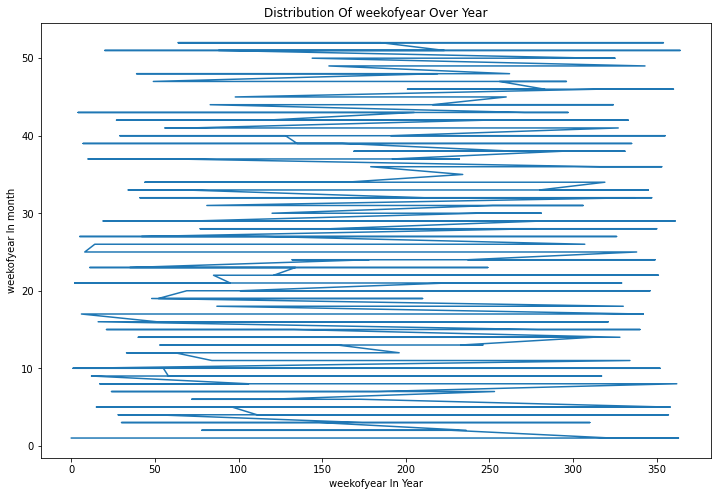

In [127]:
subset = data_sin_cos[:365] # over 365, roughly

m_d = subset['weekofyear'].sort_values().plot(figsize=(12,8),kind='line')

m_d.set_title("Distribution Of weekofyear Over Year")
m_d.set_ylabel("weekofyear In month")
m_d.set_xlabel("weekofyear In Year")

Text(0.5, 0, 'Sine Encoded Months')

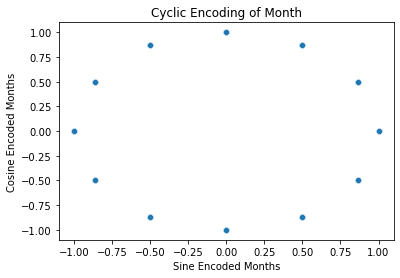

In [128]:
c_m = sns.scatterplot(x="month_sin",y="month_cos",data=data_sin_cos)

c_m.set_title("Cyclic Encoding of Month")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")